<a href="https://colab.research.google.com/github/wavesoumen/Face-Swapping/blob/main/Face_Swapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#insightface

In [ ]:
!pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 34.9 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1054052 sha256=f66a2ec004fd17fc9dc7fedabc29920bcd31e6dda18dc0587eeace4b1ffc365e
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface


In [ ]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.9 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import os
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt

In [ ]:
# app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])

In [ ]:
# app.prepare(ctx_id=0, det_size=(640, 640))
# # t1 = cv2.imread('/content/sample_data/vk1.jpeg')
# img = ins_get_image('t1')
# faces = app.get(img)
# rimg = app.draw_on(img, faces)
# cv2.imwrite("./t1_output.jpg", rimg)

In [ ]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.25.2


#Detecting face

In [ ]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:04<00:00, 61706.22KB/s]
/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


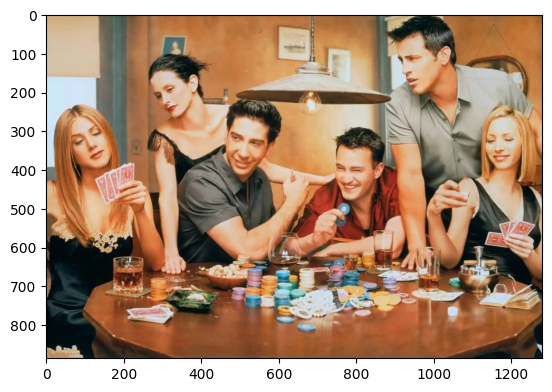

In [ ]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
faces = app.get(img)

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [ ]:
len(faces)

6

In [ ]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

#crop & plot faces

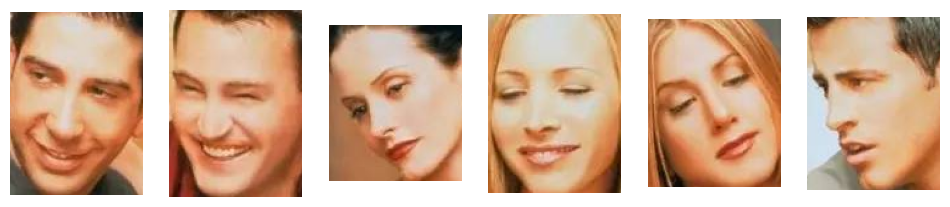

In [ ]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1,6, figsize=(12,5))

for i, face in enumerate(faces):
  bbox = face['bbox']
  bbox = [int(b) for b in bbox]
  axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
  axs[i].axis('off')

#swapping

In [ ]:
!pip install gdown

In [ ]:
import gdown

file_id = '1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF'
url = f'https://drive.google.com/uc?id={file_id}'
output = '/content/inswapper_128.onnx'  # Change file_name.extension to your desired filename and extension

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF
From (redirected): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF&confirm=t&uuid=56d9973a-4907-4eff-9c58-2c83d7e1516c
To: /content/inswapper_128.onnx
100%|██████████| 554M/554M [00:08<00:00, 66.8MB/s]


'/content/inswapper_128.onnx'

In [ ]:
swapper = insightface.model_zoo.get_model('/content/inswapper_128.onnx', download=False, download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [ ]:
swapper

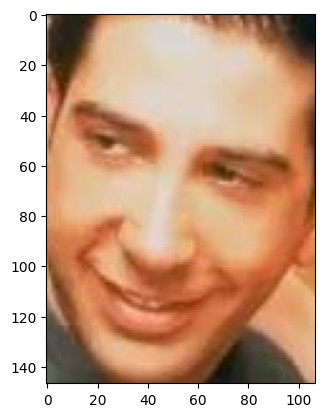

In [ ]:
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [ ]:
res=img.copy()
for face in faces:
  res = swapper.get(res, face, source_face, paste_back=True)

#Plot the Swapped image

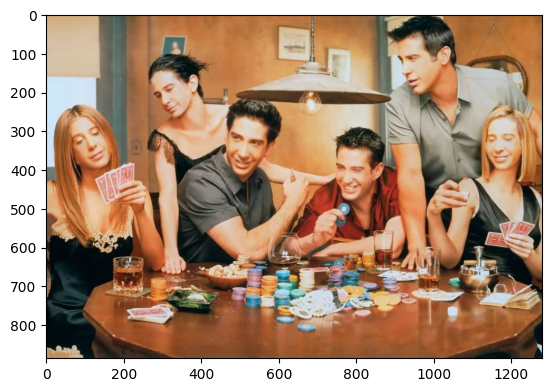

In [ ]:
plt.imshow(res[:,:,::-1])
plt.show()

In [ ]:
res=[]
for face in faces:
  _img, _ = swapper.get(img, face, source_face, paste_back=False)
  res.append(_img)

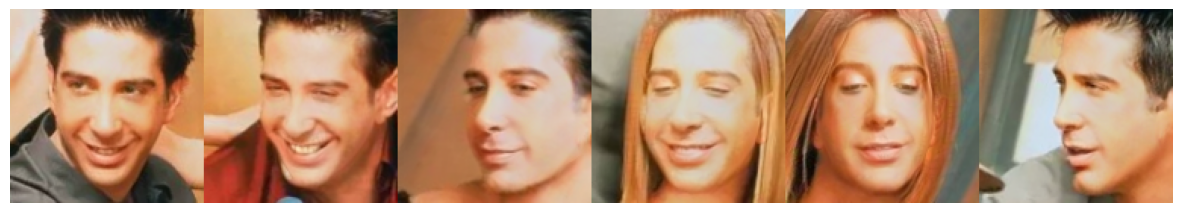

In [ ]:
res = np.concatenate(res, axis=1)
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

#Testing...

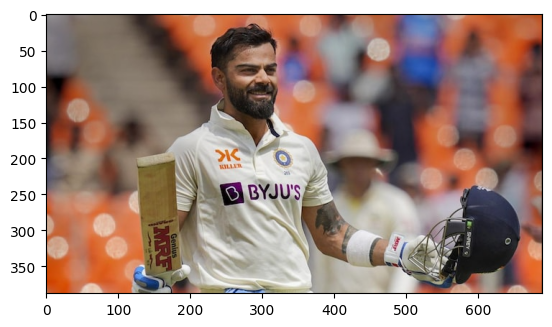

In [ ]:
vk = cv2.imread('/content/vk2.png')
plt.imshow(vk[:,:,::-1])
plt.show()

In [ ]:
vk_faces = app.get(vk)
vk_face = vk_faces[0]

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [ ]:
print(type(source_face))

<class 'insightface.app.common.Face'>


In [ ]:
res = img.copy()
for face in faces:
  res = swapper.get(res, face, vk_face, paste_back=True)

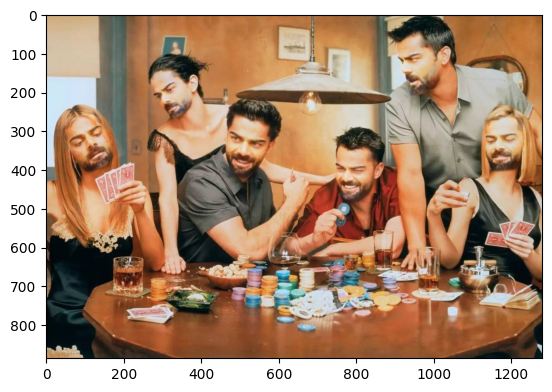

In [ ]:
plt.imshow(res[:,:,::-1])
plt.show()

#example 2

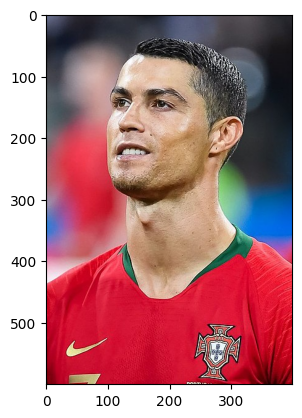

In [ ]:
cr = cv2.imread('/content/sample_data/cr7.jpg')
plt.imshow(cr[:,:,::-1])
plt.show()

In [ ]:
cr_faces = app.get(cr)
res = cr.copy()

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [ ]:
for face in cr_faces:
  res = swapper.get(res, face, vk_face, paste_back=True)

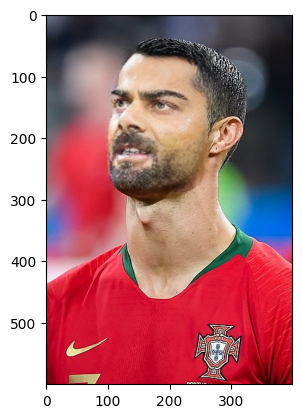

In [ ]:
plt.imshow(res[:,:,::-1])
plt.show()

#Complete Function

In [ ]:
!pip install insightface
!pip install onnxruntime

In [ ]:
import cv2
import numpy as np
import os
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt

In [ ]:
!pip install gdown

In [ ]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [ ]:
import gdown

file_id = '1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF'
url = f'https://drive.google.com/uc?id={file_id}'
output = '/content/inswapper_128.onnx'  # Change file_name.extension to your desired filename and extension

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF
From (redirected): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF&confirm=t&uuid=254222a6-1415-405a-90eb-b32495451566
To: /content/inswapper_128.onnx
100%|██████████| 554M/554M [00:04<00:00, 130MB/s]


'/content/inswapper_128.onnx'

In [ ]:
swapper = insightface.model_zoo.get_model('/content/inswapper_128.onnx', download=False, download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [ ]:
def swap_images_show(img1_fn, img2_fn, app, swapper, plot_before=True, plot_after=True):
  img1 = cv2.imread(img1_fn)
  img2 = cv2.imread(img2_fn)
  if plot_before:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1[:,:,::-1])
    axs[0].axis('off')
    axs[1].imshow(img2[:,:,::-1])
    axs[1].axis('off')
    plt.show()

    #swapping
    face1 = app.get(img1)[0]
    face2 = app.get(img2)[0]

    img1_ = img1.copy()
    img2_ = img2.copy()
    if plot_after:
      img1_ = swapper.get(img1_, face1, face2, paste_back=True)
      img2_ = swapper.get(img2_, face2, face1, paste_back=True)
      fig, axs = plt.subplots(1, 2, figsize=(10, 5))
      axs[0].imshow(img1_[:,:,::-1])
      axs[0].axis('off')
      axs[1].imshow(img2_[:,:,::-1])
      axs[1].axis('off')
      plt.show()
    return img1_, img2_

In [ ]:
_ = swap_images_show('/content/outpt4.png', '/content/Raghavan-dp-4.jpeg', app, swapper)

#Same image swapping

In [ ]:
def swap_same_image(img1_fn, app, swapper, plot_before=True, plot_after=True):
  img1 = cv2.imread(img1_fn)
  if plot_before:
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.imshow(img1[:,:,::-1])
    ax.axis('off')
    plt.show()

    #swapping
    faces = app.get(img1)
    face1, face2 = faces[0], faces[1]
    img1_ = img1.copy()
    if plot_after:
      img1_ = swapper.get(img1_, face1, face2, paste_back=True)
      img1_ = swapper.get(img1_, face2, face1, paste_back=True)
      fig, ax = plt.subplots(1, 1, figsize=(10, 5))
      ax.imshow(img1_[:,:,::-1])
      ax.axis('off')
      plt.show()
    return img1_

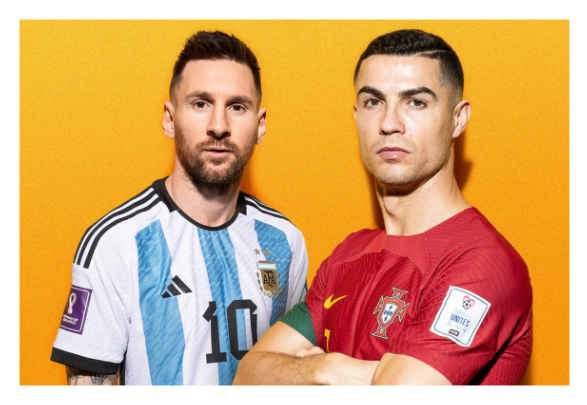

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


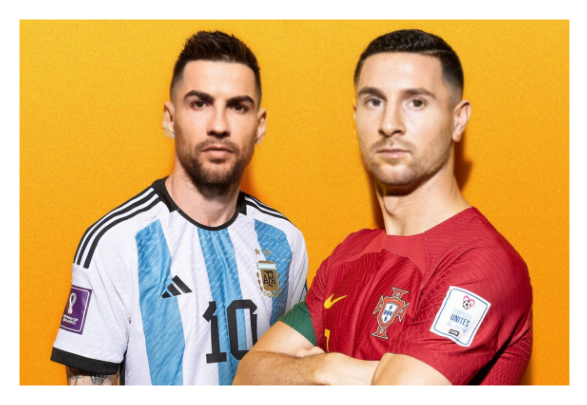

In [ ]:
_ = swap_same_image('/content/ex1.png', app, swapper)